# Load Required Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch


# Load the dataset

In [4]:
file_path = r"C:\Users\adeed\Lab 3\simulated_health_wellness_data.csv"
df = pd.read_csv(file_path)
df.head()

,Exercise_Time_Min,Healthy_Meals_Per_Day,Sleep_Hours_Per_Night,Stress_Level,BMI
0,34.967142,5,7.618856,2,33.068556
1,28.617357,8,4.105473,7,27.267672
2,36.476885,4,6.024123,1,23.779217
3,45.230299,1,8.565319,8,29.820436
4,27.658466,3,8.301648,3,30.947352


# Clean Dataset 

In [5]:
print("Missing Values:\n", df.isnull().sum())
df.describe()


Missing Values:
 Exercise_Time_Min        0
Healthy_Meals_Per_Day    0
Sleep_Hours_Per_Night    0
Stress_Level             0
BMI                      0
dtype: int64


,Exercise_Time_Min,Healthy_Meals_Per_Day,Sleep_Hours_Per_Night,Stress_Level,BMI
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,29.592290,2.875000,6.933582,4.995000,25.150008
std,9.310039,1.815449,1.422471,2.605556,5.070778
min,3.802549,0.000000,1.778787,1.000000,12.502971
25%,22.948723,2.000000,5.967243,3.000000,21.458196
50%,29.958081,3.000000,6.972331,5.000000,25.155662
75%,35.008525,4.000000,7.886509,7.000000,28.011155
max,57.201692,9.000000,10.708419,9.000000,37.898547


# Exploratory Data Analysis (EDA)

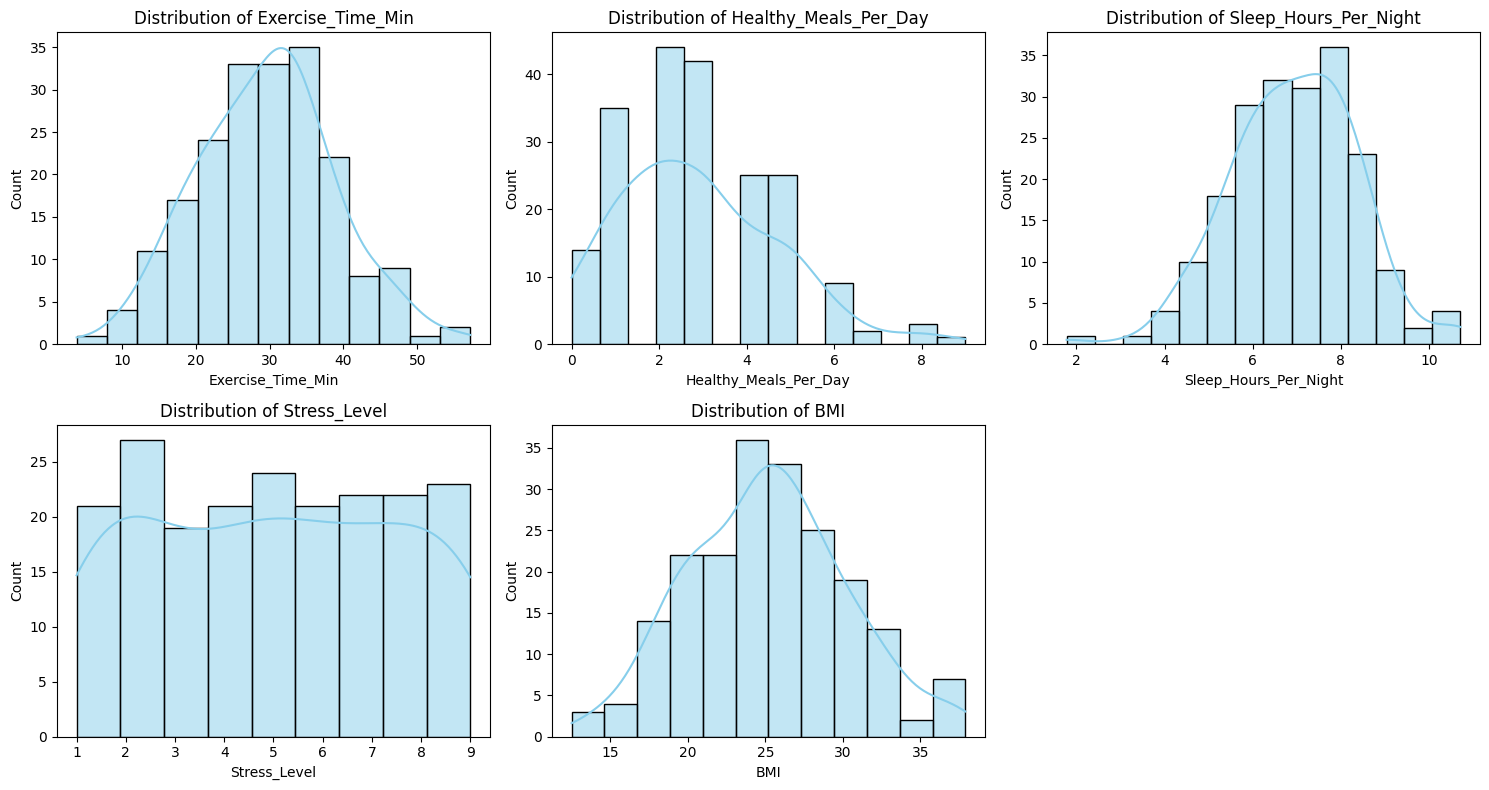

In [6]:
plt.figure(figsize=(15, 8))
for i, column in enumerate(df.columns):
    plt.subplot(2, 3, i+1)
    sns.histplot(df[column], kde=True, color="skyblue")
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()


#  Correlation Heatmap

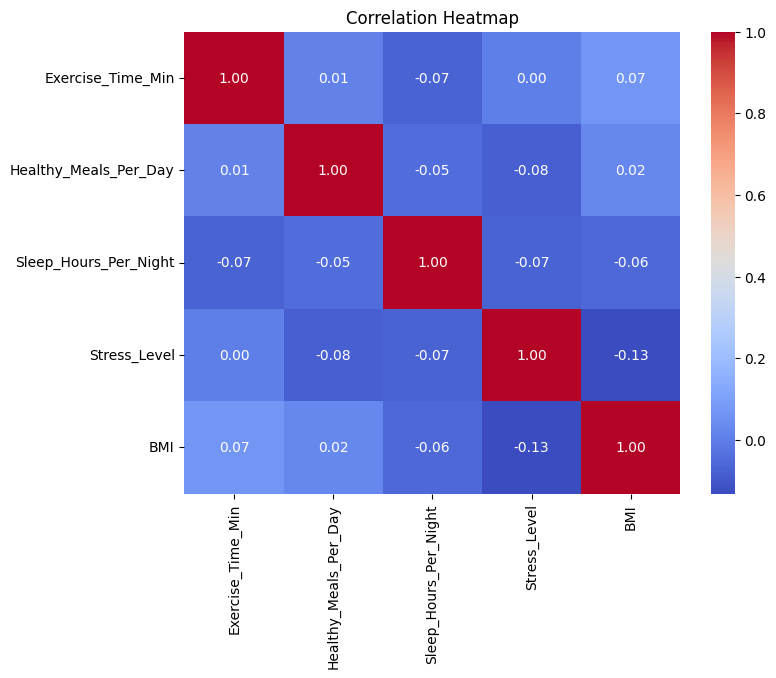

In [7]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


#  Pairplot

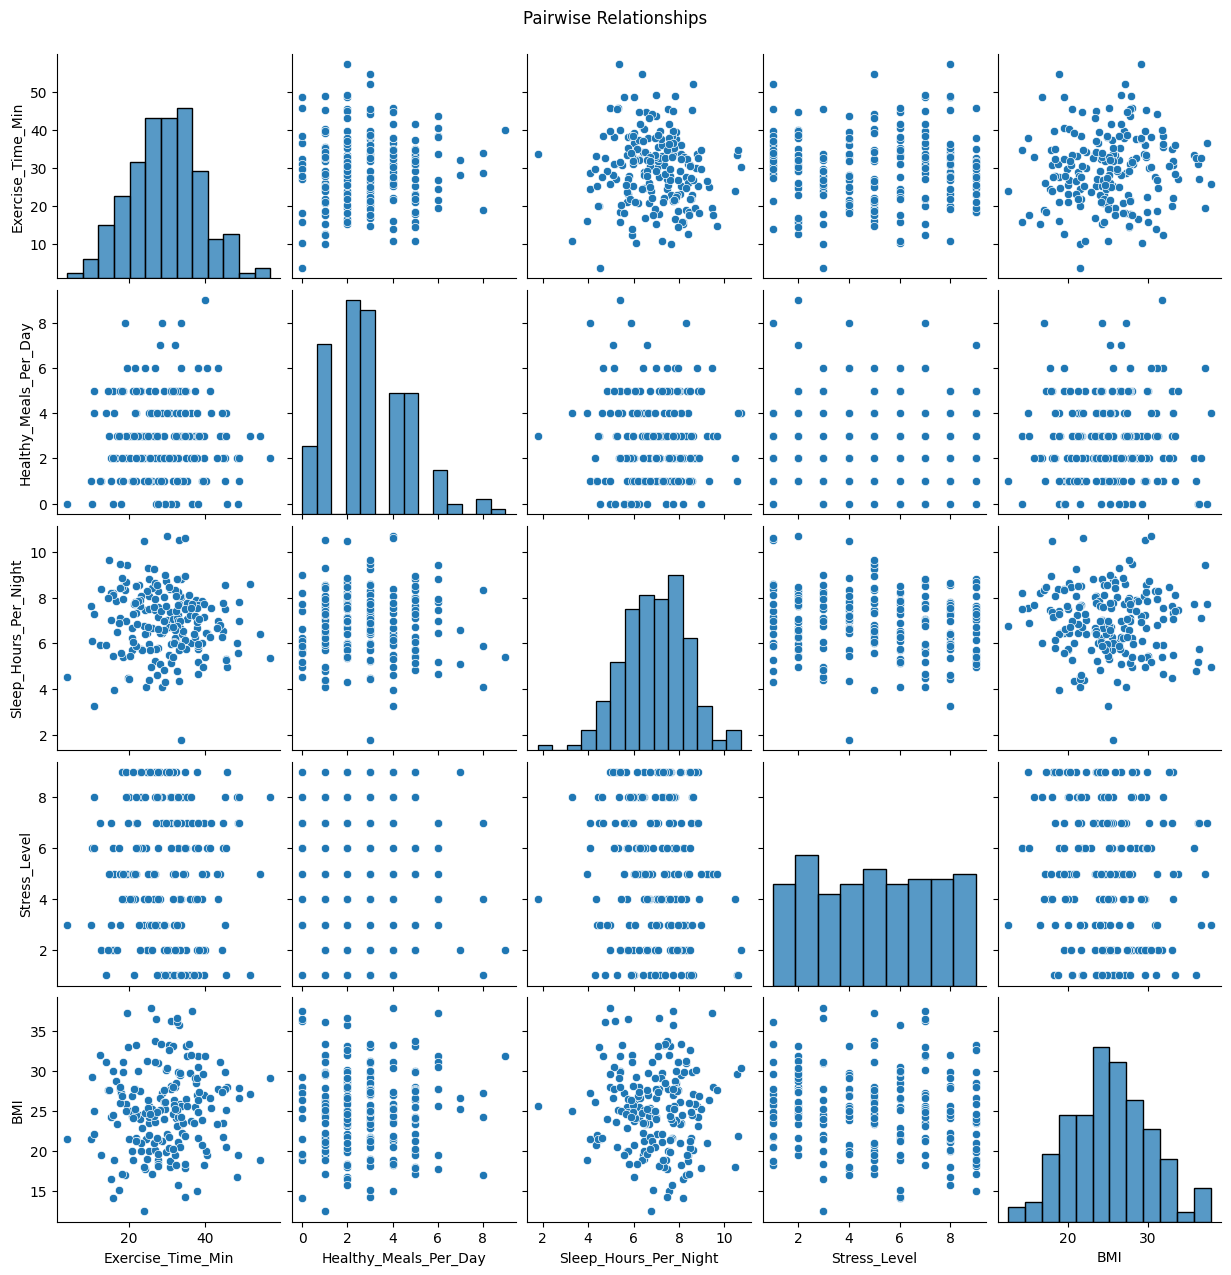

In [8]:
sns.pairplot(df)
plt.suptitle("Pairwise Relationships", y=1.02)
plt.show()


# Data Preprocessing (Standardization)


In [9]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

scaled_df = pd.DataFrame(scaled_data, columns=df.columns)
scaled_df.head()


,Exercise_Time_Min,Healthy_Meals_Per_Day,Sleep_Hours_Per_Night,Stress_Level,BMI
0,0.578767,1.173447,0.482957,-1.152351,1.565523
1,-0.104981,2.830078,-1.993156,0.771441,0.418669
2,0.741336,0.621237,-0.640956,-1.537110,-0.271010
3,1.683908,-1.035394,1.149993,1.156199,0.923359
4,-0.208235,0.069026,0.964166,-0.767593,1.146154


# K-Means Clustering on Original Data

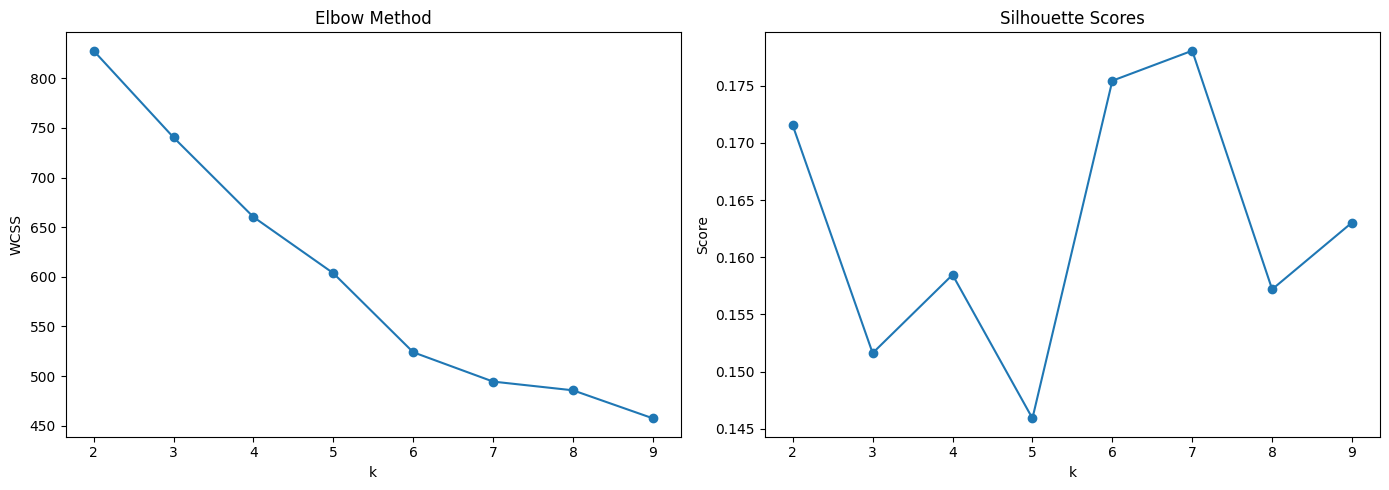

In [11]:
inertia = []
sil_scores = []
K = range(2, 10)

for k in K:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(scaled_df)
    inertia.append(model.inertia_)
    sil_scores.append(silhouette_score(scaled_df, model.labels_))

# Plot
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(K, inertia, marker='o')
plt.title("Elbow Method")
plt.xlabel("k")
plt.ylabel("WCSS")

plt.subplot(1, 2, 2)
plt.plot(K, sil_scores, marker='o')
plt.title("Silhouette Scores")
plt.xlabel("k")
plt.ylabel("Score")

plt.tight_layout()
plt.show()


# Apply K-Means with Optimal k

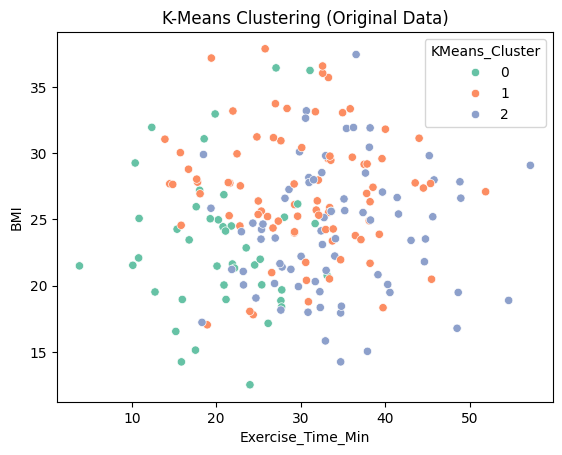

In [12]:
optimal_k = 3  # or choose based on elbow/silhouette
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['KMeans_Cluster'] = kmeans.fit_predict(scaled_df)

sns.scatterplot(data=df, x='Exercise_Time_Min', y='BMI', hue='KMeans_Cluster', palette='Set2')
plt.title("K-Means Clustering (Original Data)")
plt.show()


# Hierarchical Clustering on Original Data

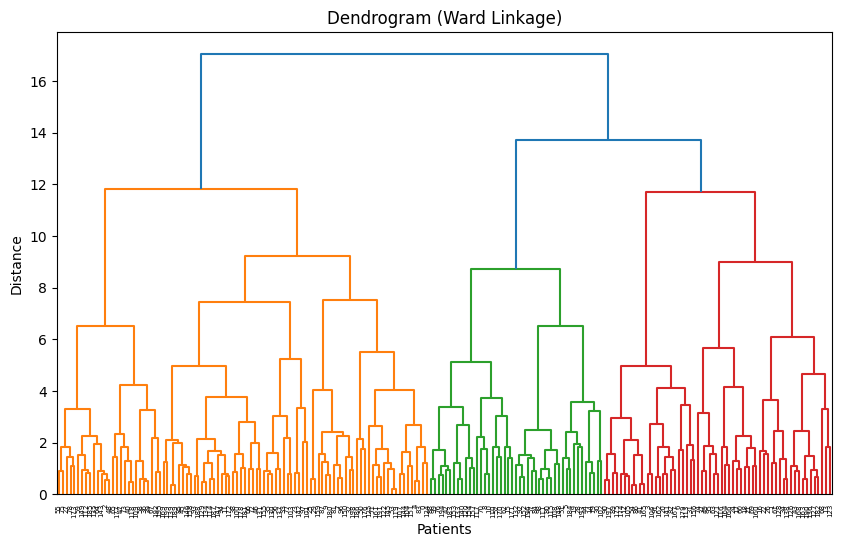

In [13]:
# Dendrogram
plt.figure(figsize=(10, 6))
dendrogram = sch.dendrogram(sch.linkage(scaled_df, method='ward'))
plt.title("Dendrogram (Ward Linkage)")
plt.xlabel("Patients")
plt.ylabel("Distance")
plt.show()


# Fit & Visualize Clusters 

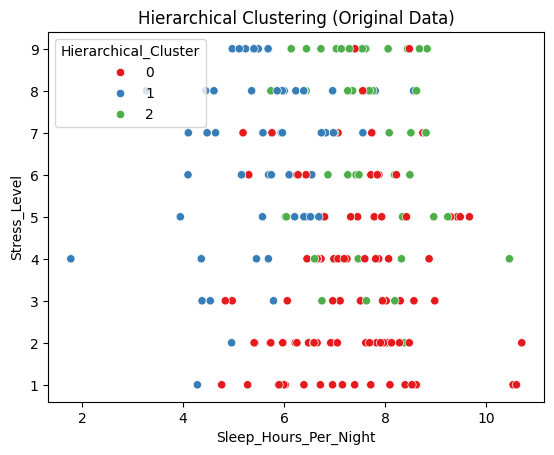

In [14]:
hc = AgglomerativeClustering(n_clusters=3)
df['Hierarchical_Cluster'] = hc.fit_predict(scaled_df)

sns.scatterplot(data=df, x='Sleep_Hours_Per_Night', y='Stress_Level', hue='Hierarchical_Cluster', palette='Set1')
plt.title("Hierarchical Clustering (Original Data)")
plt.show()


# Dimensionality Reduction Using PCA

Explained Variance: [0.23691549 0.22082517]


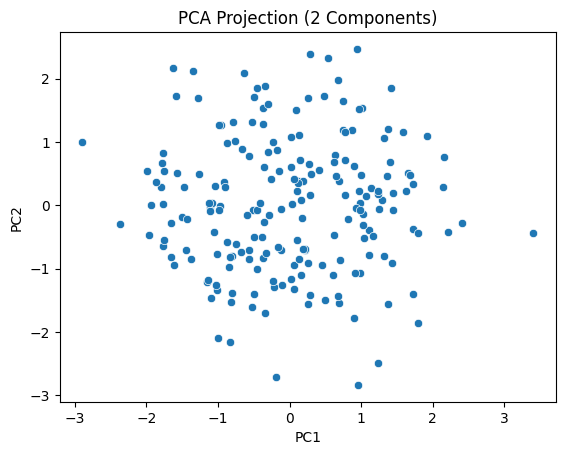

In [15]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_df)
pca_df = pd.DataFrame(pca_data, columns=['PC1', 'PC2'])

print("Explained Variance:", pca.explained_variance_ratio_)
sns.scatterplot(x='PC1', y='PC2', data=pca_df)
plt.title("PCA Projection (2 Components)")
plt.show()


#  PCA Component Scatter Plot (Raw)

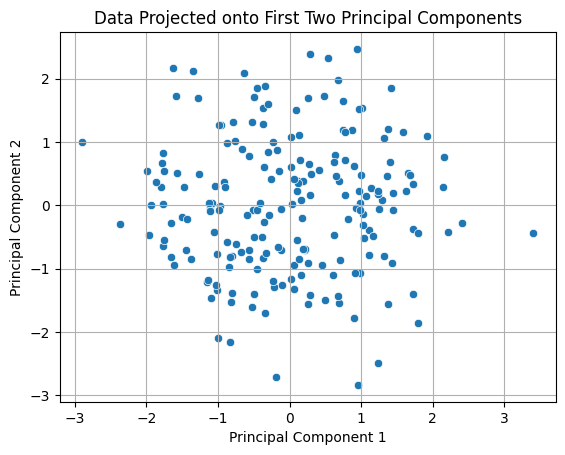

In [21]:
sns.scatterplot(x=pca_df['PC1'], y=pca_df['PC2'])
plt.title("Data Projected onto First Two Principal Components")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()

# PCA Explained Variance Plot

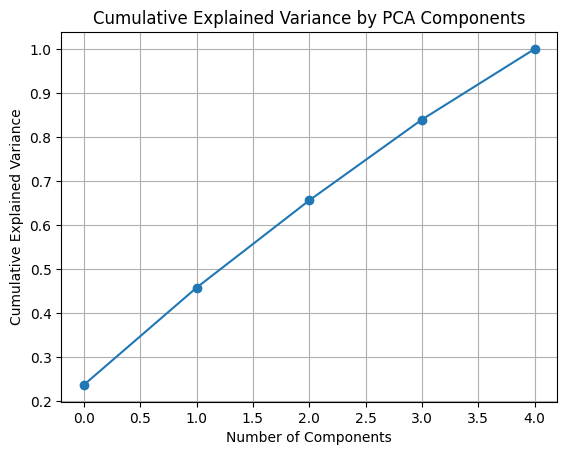

In [17]:
pca = PCA().fit(scaled_df)
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.title("Cumulative Explained Variance by PCA Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.show()


# Clustering on PCA-Reduced Data

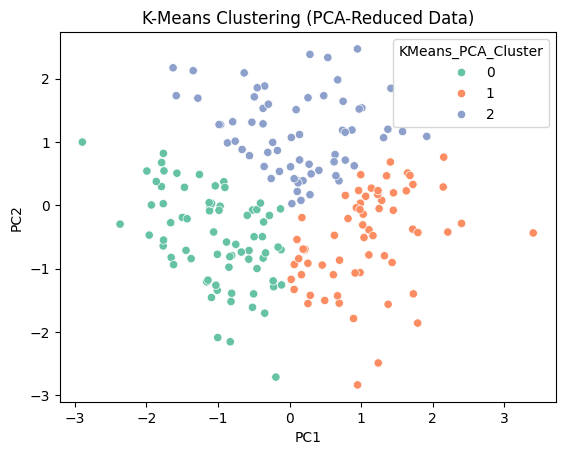

In [18]:
kmeans_pca = KMeans(n_clusters=3, random_state=42)
pca_df['KMeans_PCA_Cluster'] = kmeans_pca.fit_predict(pca_df)

sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='KMeans_PCA_Cluster', palette='Set2')
plt.title("K-Means Clustering (PCA-Reduced Data)")
plt.show()


#  Hierarchical on PCA

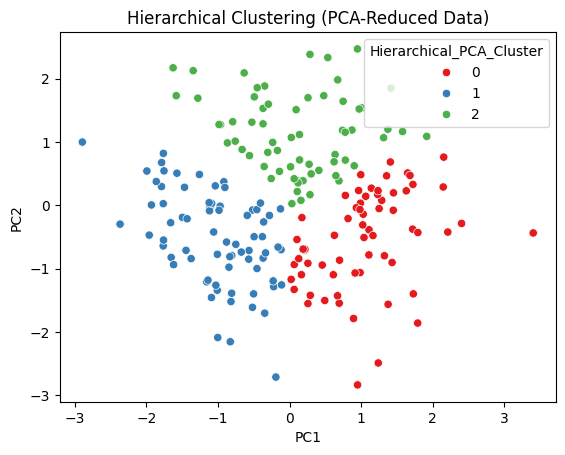

In [19]:
hc_pca = AgglomerativeClustering(n_clusters=3)
pca_df['Hierarchical_PCA_Cluster'] = hc_pca.fit_predict(pca_df)

sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Hierarchical_PCA_Cluster', palette='Set1')
plt.title("Hierarchical Clustering (PCA-Reduced Data)")
plt.show()


# Compare Clustering Performance


In [20]:
print("Silhouette Score - KMeans (Original):", silhouette_score(scaled_df, df['KMeans_Cluster']))
print("Silhouette Score - KMeans (PCA):", silhouette_score(pca_df[['PC1', 'PC2']], pca_df['KMeans_PCA_Cluster']))

print("Silhouette Score - Hierarchical (Original):", silhouette_score(scaled_df, df['Hierarchical_Cluster']))
print("Silhouette Score - Hierarchical (PCA):", silhouette_score(pca_df[['PC1', 'PC2']], pca_df['Hierarchical_PCA_Cluster']))


Silhouette Score - KMeans (Original): 0.1516159911787657
Silhouette Score - KMeans (PCA): 0.3625606718282872
Silhouette Score - Hierarchical (Original): 0.13628495765267165
Silhouette Score - Hierarchical (PCA): 0.3625606718282872
